In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn import metrics

%matplotlib inline

In [117]:
beers = pd.read_csv('./data/beers_w_ratings.csv',index_col=0)
print beers.shape
beers.head()

(2418, 16)


,abv,brewery_location,brewery_name,ibu,id,name,size,style,ibu_clean,abv_clean,state,r8_beer_name,r8_beer_style,r8_beer_parent_style,r8_beer_overall_score,r8_beer_avg_rating
0,5.0%,"Chandler, AZ",SanTan Brewing Company,20.0,2707.0,Mr. Pineapple,12 oz.,Wheat Ale,20.000000,5.0,AZ,SanTan Mr. Pineapple,Wheat Ale,Wheat Beer,52.058884,3.215853
1,8.2%,"Cincinnati, OH",Christian Moerlein Brewing Company,70.0,2706.0,Handle Bar (Current),12 oz.,American Stout,70.000000,8.2,OH,NaN,NaN,NaN,NaN,NaN
2,5.0%,"Forest, VA",Apocalypse Ale Works,18.0,2705.0,Golden Censer,12 oz.,Wheat Ale,18.000000,5.0,VA,Apocalypse Ale Works Golden Censer,Wheat Ale,Wheat Beer,48.297825,3.187316
3,6.2%,"Manassas, VA",Heritage Brewing Company,NaN,2704.0,Freedom Isn't Free,12 oz.,American IPA,67.634551,6.2,VA,NaN,India Pale Ale (IPA),Anglo-American Ales,36.875340,3.016386
4,7.4%,"Manassas, VA",Heritage Brewing Company,115.0,2703.0,Kings Mountain,12 oz.,Scottish Ale,115.000000,7.4,VA,Heritage Kings Mountain,Scotch Ale,Anglo-American Ales,49.682676,3.207314


In [118]:
raw = beers[['ibu_clean','abv_clean','style','r8_beer_parent_style','state','r8_beer_overall_score','r8_beer_avg_rating']]

In [119]:
state_dummies = pd.get_dummies(raw.state,prefix='state_')
style_dummies = pd.get_dummies(raw['style'],prefix='style_')
parent_style_dummies = pd.get_dummies(raw.r8_beer_parent_style,prefix='parent_style_')
dummies = state_dummies.merge(style_dummies, left_index=True, right_index=True).merge(parent_style_dummies, left_index=True, right_index=True)
data = raw.merge(dummies, left_index=True, right_index=True)
data.drop(['state','style','r8_beer_parent_style'],axis=1,inplace=True)
print data.shape
data.head()

(2418, 163)


,ibu_clean,abv_clean,r8_beer_overall_score,r8_beer_avg_rating,state__AK,state__AL,state__AR,state__AZ,state__CA,state__CO,...,style__Witbier,parent_style__Anglo-American Ales,parent_style__Belgian-Style Ales,parent_style__Ciders,parent_style__Lagers,parent_style__Lambic and Sour Ale,parent_style__Meads,parent_style__Stouts and Porters,"parent_style__Traditional, Spice, Other",parent_style__Wheat Beer
0,20.000000,5.0,52.058884,3.215853,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,70.000000,8.2,NaN,NaN,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,18.000000,5.0,48.297825,3.187316,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,67.634551,6.2,36.875340,3.016386,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,115.000000,7.4,49.682676,3.207314,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [161]:
data_dropnas = data.dropna()
print data_dropnas.shape

#X = data_dropnas.drop(['r8_beer_overall_score','r8_beer_avg_rating'],axis=1)
y = data_dropnas.r8_beer_overall_score
state_cols = [x for x in data.columns if x.startswith('state_')]
style_cols = [x for x in data.columns if x.startswith('style_')]
parent_style_cols = [x for x in data.columns if x.startswith('parent_style_')]

columns = ['ibu_clean','abv_clean']
columns.extend(parent_style_cols)
#print columns
X = data_dropnas[columns]
lr = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X,y)

lr.fit(X_train,y_train)
y_test_pred = lr.predict(X_test)
print lr.score(X_train,y_train)
print lr.score(X_test,y_test)
X.head()

(996, 163)
0.210450397551
0.105066731122


,ibu_clean,abv_clean,parent_style__Anglo-American Ales,parent_style__Belgian-Style Ales,parent_style__Ciders,parent_style__Lagers,parent_style__Lambic and Sour Ale,parent_style__Meads,parent_style__Stouts and Porters,"parent_style__Traditional, Spice, Other",parent_style__Wheat Beer
0,20.000000,5.0,0,0,0,0,0,0,0,0,1
2,18.000000,5.0,0,0,0,0,0,0,0,0,1
3,67.634551,6.2,1,0,0,0,0,0,0,0,0
4,115.000000,7.4,1,0,0,0,0,0,0,0,0
5,110.000000,8.0,1,0,0,0,0,0,0,0,0


In [107]:
kf = KFold(n_splits=2, shuffle=True)
print lr.score(X_train,y_train)
print np.sqrt(np.mean(-cross_val_score(lr, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')))
print (cross_val_score(lr,X_train,y_train,cv=kf))

0.0958330038048
1.77587735448e+12
[ -4.20710622e+19  -4.69662108e+19]


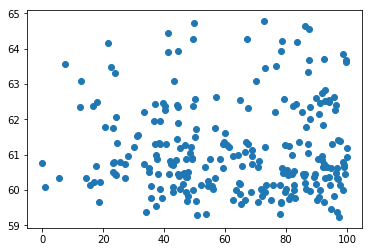

In [92]:
plt.scatter(y_test,y_test_pred);